In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [8]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/dahlia/ \
/Users/earl/Desktop/dipladenia')

0

In [9]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'

ctrl_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080/'
hist_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080_hist/'
rcp85_path = '/Users/earl/Desktop/dipladenia/gfdl_nyf_1080_rcp85/'

p15_check_1styear


In [71]:
ice_month_ctrl_ncra_SST = xr.open_dataset(
    ctrl_path + 'ice_month_ncra_SST.nc', decode_times=False)['SST'][0,:,:]
ice_month_hist_ncra_SST = xr.open_dataset(
    hist_path + 'ice_month_ncra_SST.nc', decode_times=False)['SST'][0,:,:]
ice_month_rcp85_ncra_SST = xr.open_dataset(
    rcp85_path + 'ice_month_ncra_SST.nc', decode_times=False)['SST'][0,:,:]

xt = xr.open_dataset(
    ctrl_path + 'ice_month_ncra_SST.nc', decode_times=False)['xt'] + 360
yt = xr.open_dataset(
    ctrl_path + 'ice_month_ncra_SST.nc', decode_times=False)['yt']

(1440,)


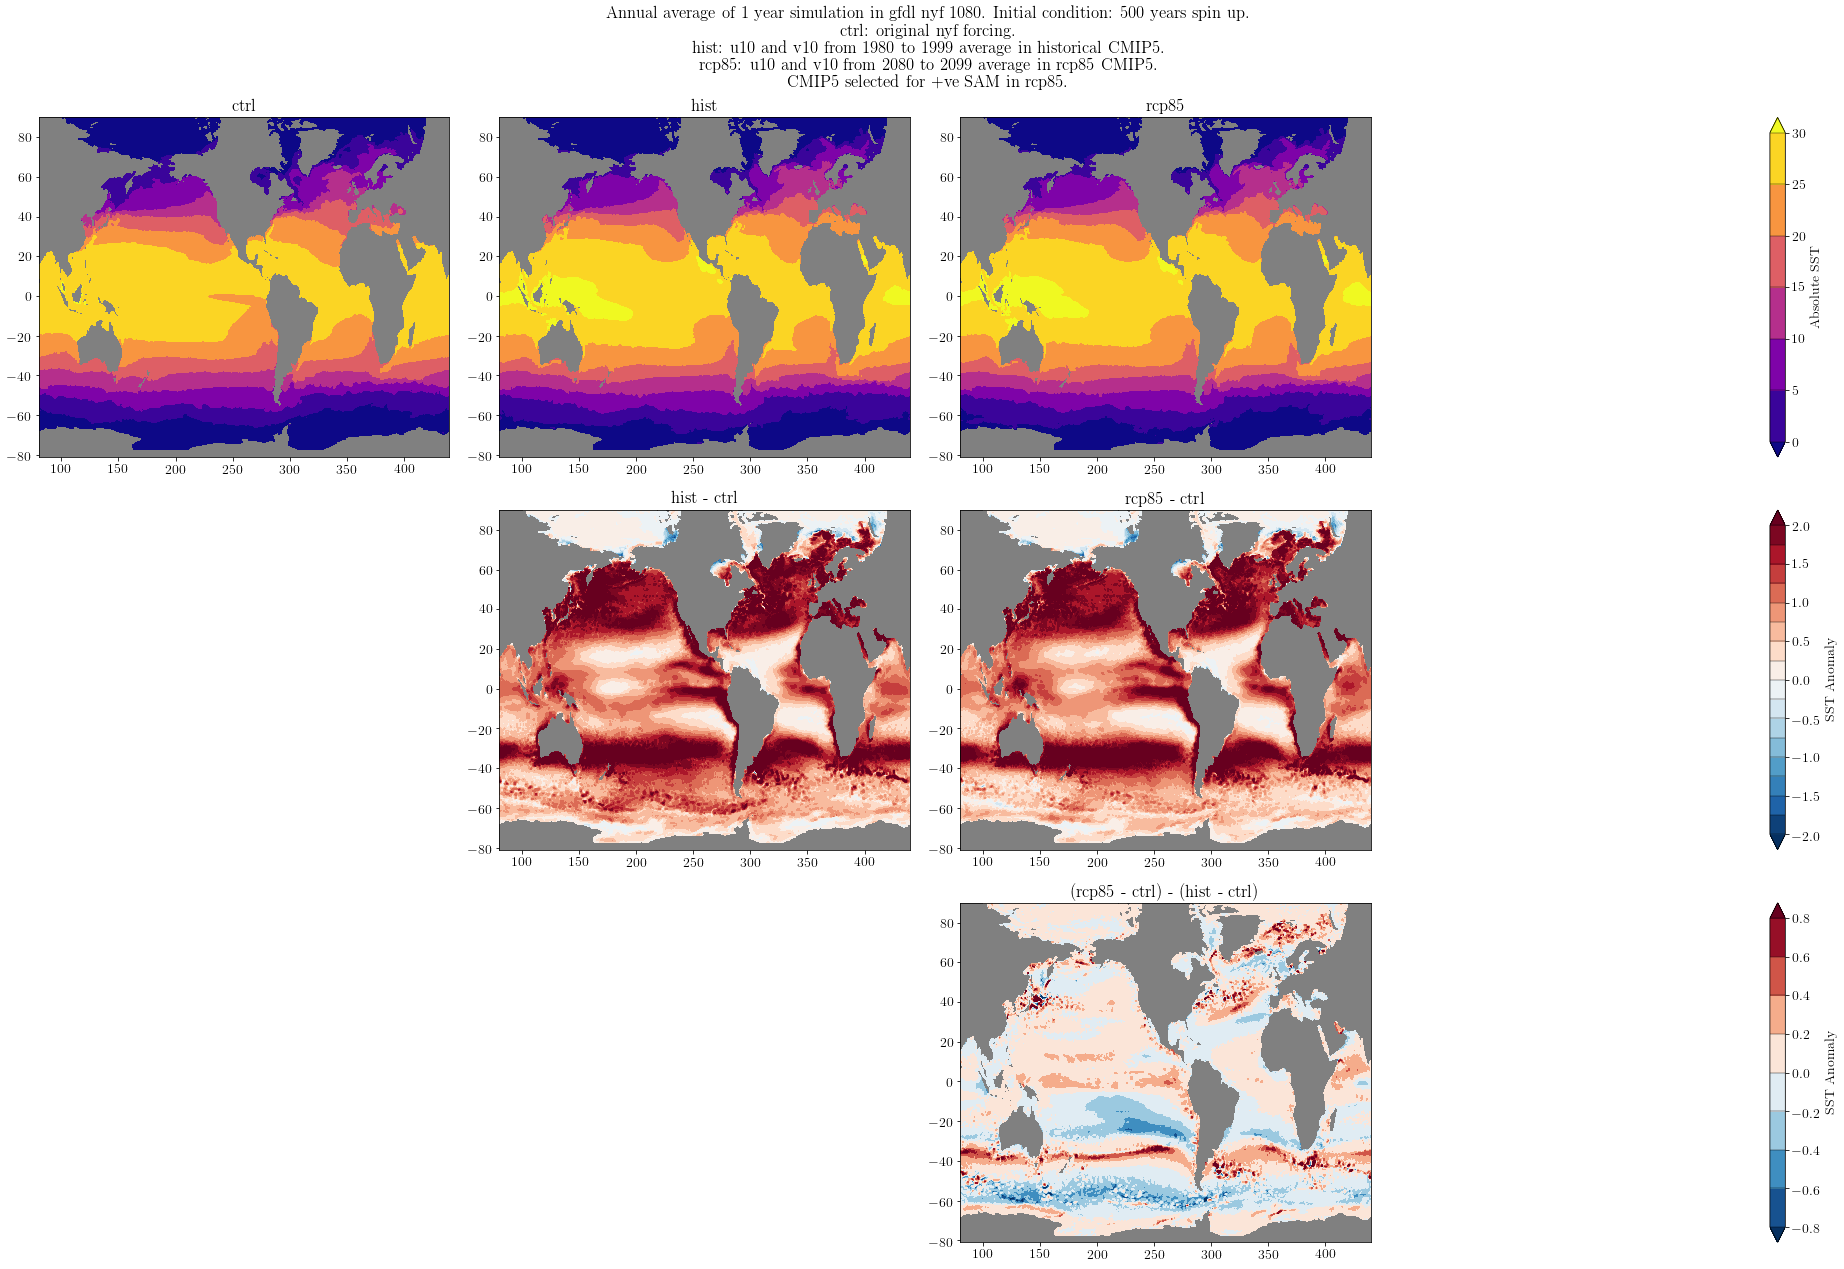

In [72]:
print(np.shape(xt))

matplotlib.rcParams.update({'font.size': 14}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing.\n' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5.\n'
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('plasma')
step = 5
contf_lvls = np.arange(0,30+1e-08,step)
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt, yt, ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt, yt, ice_month_hist_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt, yt, ice_month_rcp85_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'Absolute SST') 
plt.axis('off')

cmap = plt.get_cmap('RdBu_r')
step = 0.25
contf_lvls = np.arange(-2,2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt, yt, ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt, yt, ice_month_rcp85_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'SST Anomaly') 
plt.axis('off')

cmap = plt.get_cmap('RdBu_r')
step = 0.2
contf_lvls = np.arange(-0.8,0.8+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt, yt, 
    (ice_month_rcp85_ncra_SST - ice_month_ctrl_ncra_SST) - (ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST), 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('(rcp85 - ctrl) - (hist - ctrl)')
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'SST Anomaly') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.92])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)